# Question: Do domain interests relate to comfort?

In [1]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/minu/Documents/ucsb/PSTAT 197A/module-0-class-survey-data-table13/data/combined.csv')
print(df.head())

   response_id prog.prof  prog.comf math.prof  math.comf stat.prof  stat.comf  \
0            1       adv          5       int          4       adv          5   
1            2       adv          5       int          4       adv          4   
2            3       adv          4       int          4       adv          4   
3            4       adv          4       int          3       adv          4   
4            6       int          3       int          3       int          3   

  updv.num dom_tf                                rsrch_or_ind  ...  \
0       9+    Yes                               No preference  ...   
1      6-8     No  I'm more interested in an industry project  ...   
2       9+     No  I'm more interested in an industry project  ...   
3       9+     No  I'm more interested in an industry project  ...   
4      6-8    Yes  I'm more interested in an industry project  ...   

   Entertainment  Environmental science  Music & Audio  Neuroscience  \
0          False    

## Descriptives

In [3]:
domain_cols = ['Biology', 'Chemistry', 'Ecology', 'Economics / Accounting', 'Entertainment', 'Environmental science', 
               'Music & Audio', 'Neuroscience', 'Psychology', 'Public health', 'Social or political science', 
               'Software development', 'Technology', 'media/musical technology']

comfort_cols = ['prog.comf', 'math.comf', 'stat.comf']

for d in domain_cols:
    print(df.groupby(d)[comfort_cols].mean().round(2))

         prog.comf  math.comf  stat.comf
Biology                                 
False         3.69       4.03       3.97
True          4.23       4.00       4.23
           prog.comf  math.comf  stat.comf
Chemistry                                 
False           3.85       4.02       4.04
True            3.00       4.00       4.00
         prog.comf  math.comf  stat.comf
Ecology                                 
False         3.80       4.07       4.07
True          4.25       3.50       3.75
                        prog.comf  math.comf  stat.comf
Economics / Accounting                                 
False                        3.83        4.0       4.04
True                         4.00        5.0       4.00
               prog.comf  math.comf  stat.comf
Entertainment                                 
False               3.88       4.02       4.06
True                2.00       4.00       3.00
                       prog.comf  math.comf  stat.comf
Environmental science            

In [4]:
top_domains = {}

for c in comfort_cols:
    domain_means = {}
    for d in domain_cols:
        mean_val = df.loc[df[d] == 1, c].mean()
        domain_means[d] = mean_val
    # Sort descending and store top 3
    sorted_domains = sorted(domain_means.items(), key=lambda x: x[1], reverse=True)
    top_domains[c] = sorted_domains[:3]

for c, domains in top_domains.items():
    print(f"\nTop domains for {c}:")
    for d, val in domains:
        print(f"{d}: {val:.2f}")


Top domains for prog.comf:
Ecology: 4.25
Biology: 4.23
Economics / Accounting: 4.00

Top domains for math.comf:
Economics / Accounting: 5.00
Music & Audio: 5.00
Public health: 4.13

Top domains for stat.comf:
Music & Audio: 5.00
Biology: 4.23
Public health: 4.22


## Visualizations

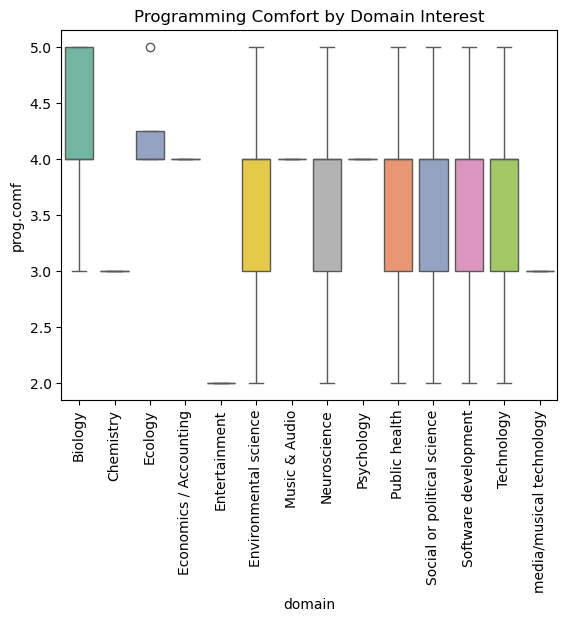

In [5]:
long_df = df.melt(
    id_vars=['response_id', 'prog.comf', 'math.comf', 'stat.comf'],
    value_vars=domain_cols,
    var_name='domain',
    value_name='interest'
)
# Keep only rows where domain was selected
long_df = long_df[long_df['interest'] == 1]

sns.boxplot(x='domain', y='prog.comf', hue='domain', data=long_df, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title("Programming Comfort by Domain Interest")
plt.show()

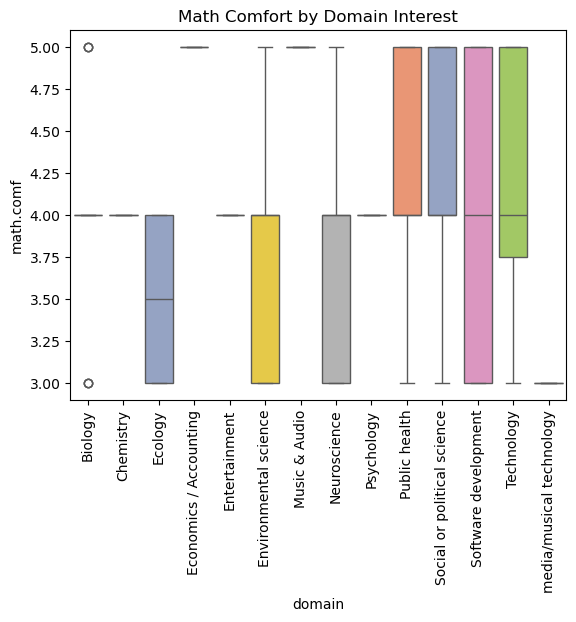

In [6]:
sns.boxplot(x='domain', y='math.comf', hue='domain', data=long_df, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title("Math Comfort by Domain Interest")
plt.show()

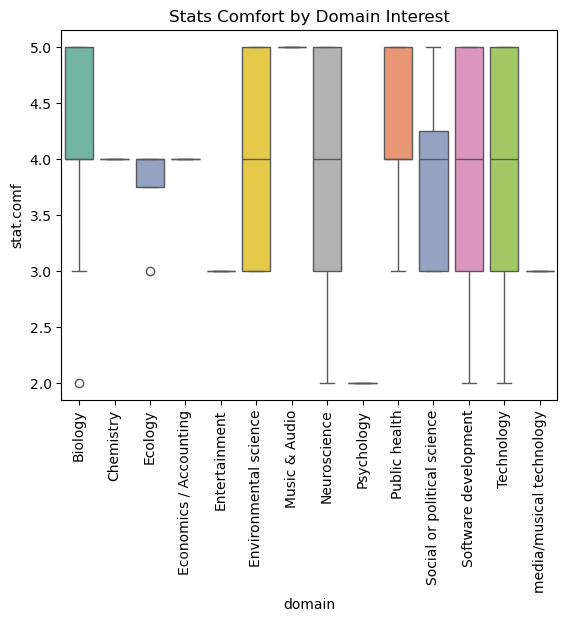

In [7]:
sns.boxplot(x='domain', y='stat.comf', hue='domain', data=long_df, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title("Stats Comfort by Domain Interest")
plt.show()

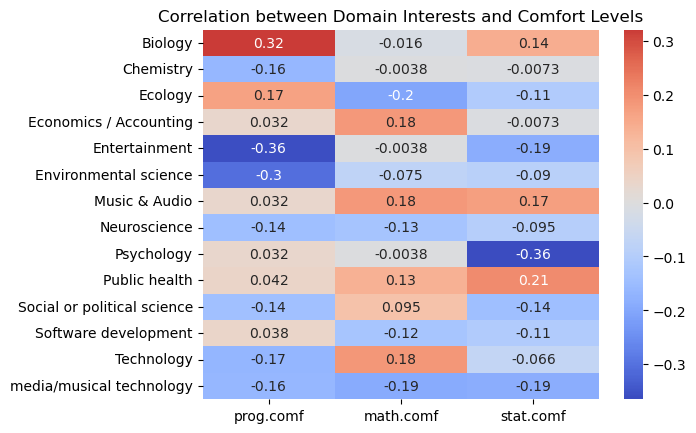

In [8]:
heatmap_data = df[domain_cols + comfort_cols].corr().loc[domain_cols, comfort_cols]

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Domain Interests and Comfort Levels")
plt.show()

## Kruskal-Wallis Tests

In [9]:
# Test whether comfort differs across domains
for c in comfort_cols:
    samples = [group[c].dropna() for name, group in long_df.groupby('domain')]
    stat, p = kruskal(*samples)
    print(f"{c}: H = {stat:.3f}, p = {p:.4f}")

prog.comf: H = 15.645, p = 0.2688
math.comf: H = 9.211, p = 0.7569
stat.comf: H = 12.006, p = 0.5272


## Conclusions

Those most comfortable with programming tend to be interested in ecology, biology, economics/accounting. Comfort with math is most associated with interest in economics/accounting, music & audio, and public health. Finally, those most comfortable with statistics are interested in music & audio, biology, and public health.

No statistically significant differences were found in comfort across domains, implying that there is no connection between domain interest and comfort in math, programming, and stats. This could be because students in the capstone program are already comfortable in these fields and likely apply because they have experience in them.